In [15]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
# Loading the dataset from the UCI repository (Banknote Authentication Dataset)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
columns = ["Variance", "Skewness", "Curtosis", "Entropy", "Class"]
df = pd.read_csv(url, header=None, names=columns)
print("Dataset Preview:")
print(df.head())

# Splitting features and target variable
X = df.drop(columns=["Class"])
y = df["Class"]

# Splitting into training and testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Dataset Preview:
   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [17]:
# Train SVM models with different kernels
kernels = ['linear', 'poly', 'rbf']
models = {}
models_2d = {}

In [18]:
# Create 2D versions of the datasets using the first two features for visualization
X_train_2d = X_train.iloc[:, :2]
X_test_2d = X_test.iloc[:, :2]

for kernel in kernels:
    # Configure model parameters based on kernel type
    if kernel == 'poly':
        model = SVC(kernel=kernel, degree=3, gamma='auto', C=1.0)
        model_2d = SVC(kernel=kernel, degree=3, gamma='auto', C=1.0)
    else:
        model = SVC(kernel=kernel, gamma='auto', C=1.0)
        model_2d = SVC(kernel=kernel, gamma='auto', C=1.0)
    
    # Train models on full features and 2D subset for visualization
    model.fit(X_train, y_train)
    model_2d.fit(X_train_2d, y_train)
    
    models[kernel] = model
    models_2d[kernel] = model_2d
    
    # Evaluate model accuracy on the test set
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Kernel: {kernel} | Accuracy: {acc:.4f}")

Kernel: linear | Accuracy: 0.9855
Kernel: poly | Accuracy: 0.9891
Kernel: rbf | Accuracy: 1.0000



Decision Boundary for Linear Kernel:


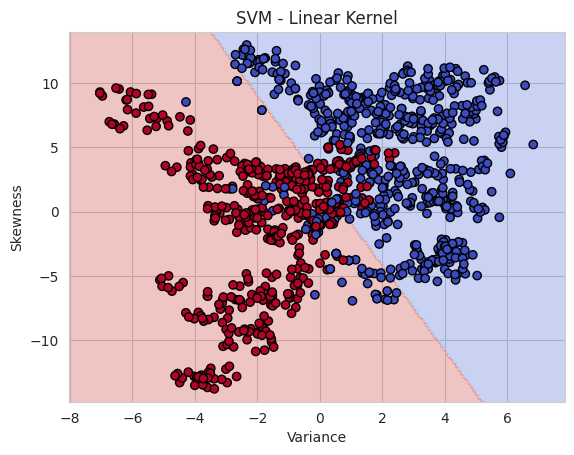


Decision Boundary for Poly Kernel:


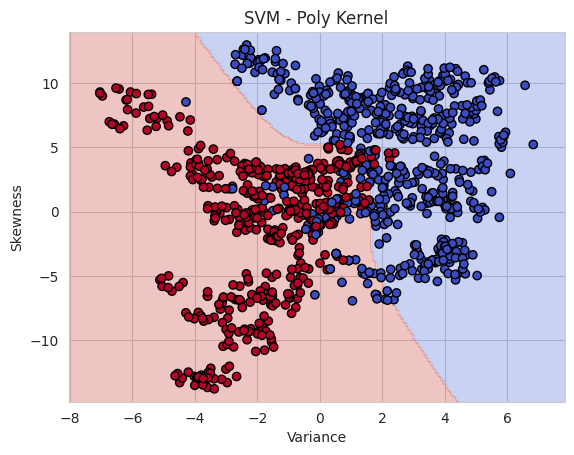


Decision Boundary for Rbf Kernel:


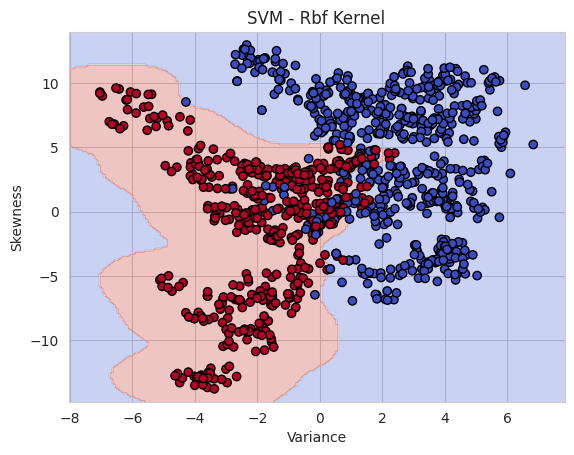

In [19]:
# Ensure color-blind friendly palettes and accessible visualizations
sns.set_palette("colorblind")
sns.set_style("whitegrid")

# Function to visualize decision boundaries for 2D data
def plot_decision_boundary(model, X, y, title):
    # Only works if the data has 2 features
    if X.shape[1] > 2:
        print(f"Cannot plot decision boundary: {X.shape[1]} features found, but only 2D plots supported.")
        return

    # Determine grid boundaries
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # Prepare grid for prediction
    mesh_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X.columns[:2])
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundaries and data points
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm, marker='o')
    plt.title(title)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.show()

# Visualize decision boundaries for each kernel using 2D models
for kernel, model in models_2d.items():
    print(f"\nDecision Boundary for {kernel.capitalize()} Kernel:")
    plot_decision_boundary(model, X_train_2d, y_train, f"SVM - {kernel.capitalize()} Kernel")



In [20]:
# Display detailed classification report for the RBF kernel (commonly one of the best performing)
print("\nClassification Report (RBF Kernel):\n", classification_report(y_test, models['rbf'].predict(X_test)))


Classification Report (RBF Kernel):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

